In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
crop_data= pd.read_csv('Crop_recommendation.csv')

In [ ]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop_data.shape

(2200, 8)

In [ ]:
crop_data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
crop_data.duplicated().sum()

np.int64(0)

In [ ]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
corr = crop_data.select_dtypes(include=['number']).corr()

In [ ]:
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

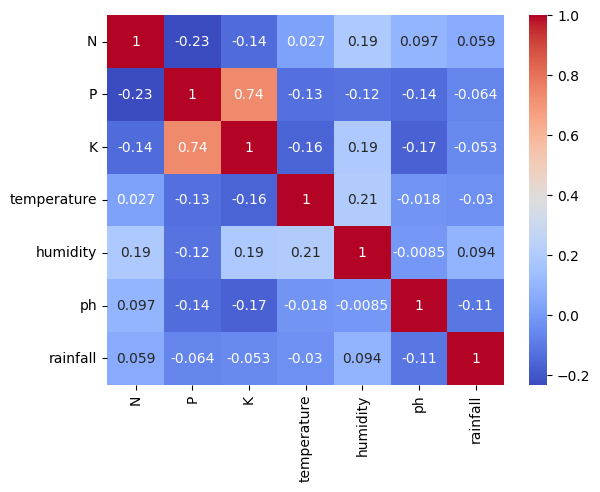

In [ ]:
sns.heatmap(corr, annot= True, cbar= True, cmap='coolwarm')

In [ ]:
crop_data['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


/tmp/ipython-input-81-1004048379.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data['ph'])


<Axes: xlabel='ph', ylabel='Density'>

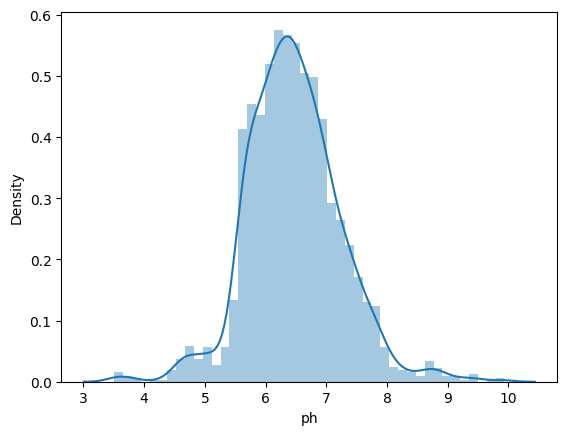

In [ ]:
sns.distplot(crop_data['ph'])

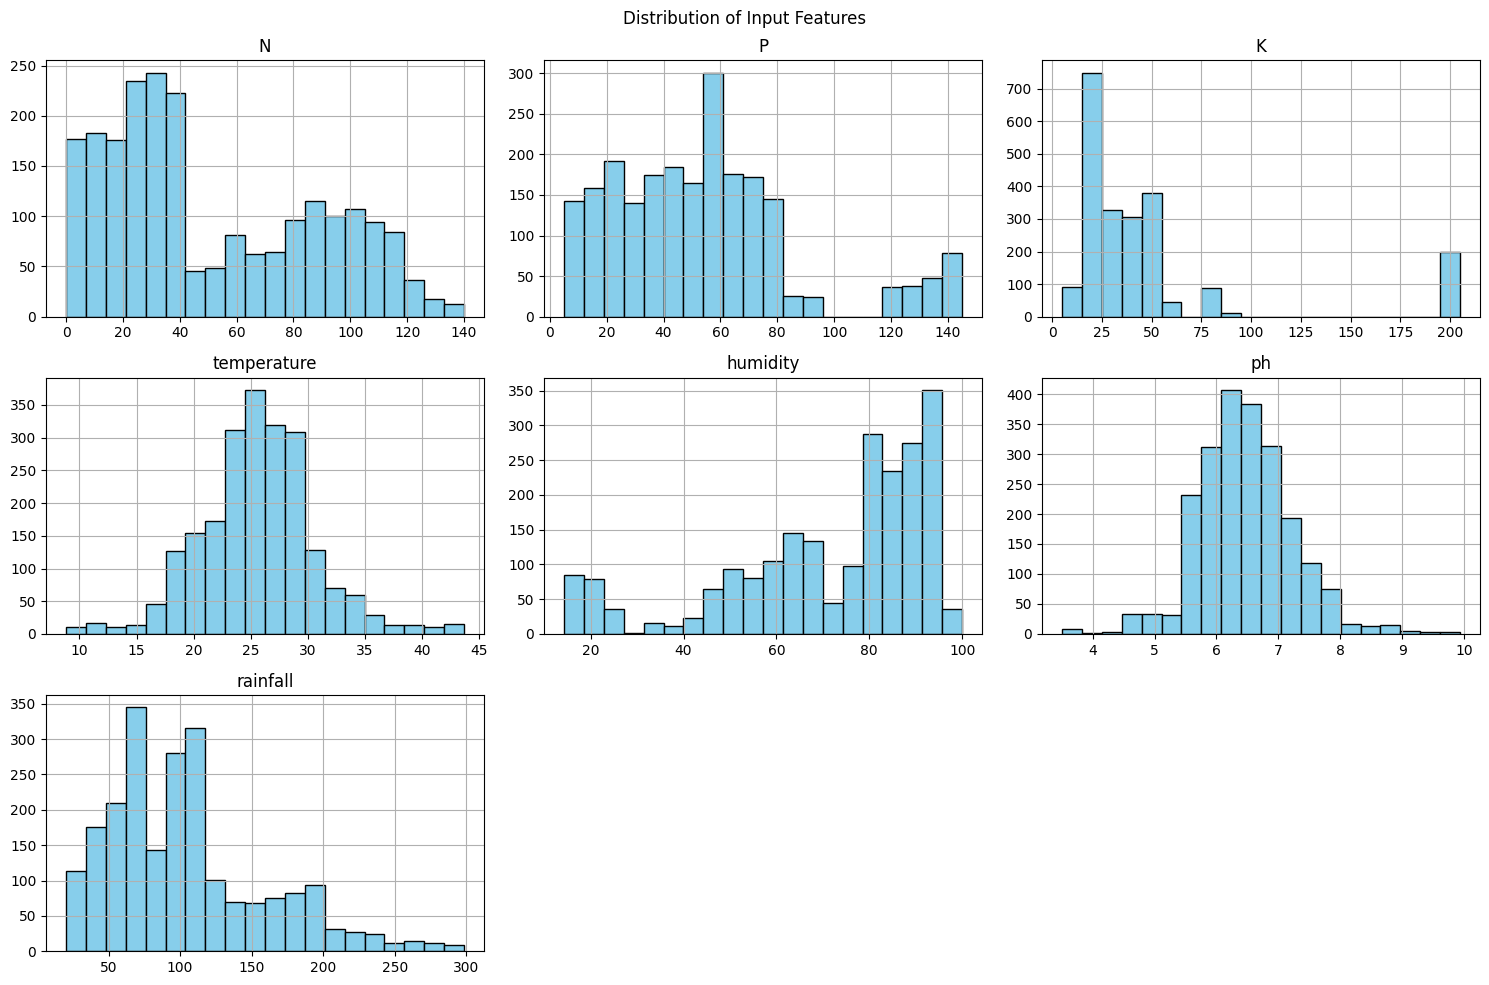

In [ ]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
crop_data[features].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Input Features')
plt.tight_layout()
plt.show()


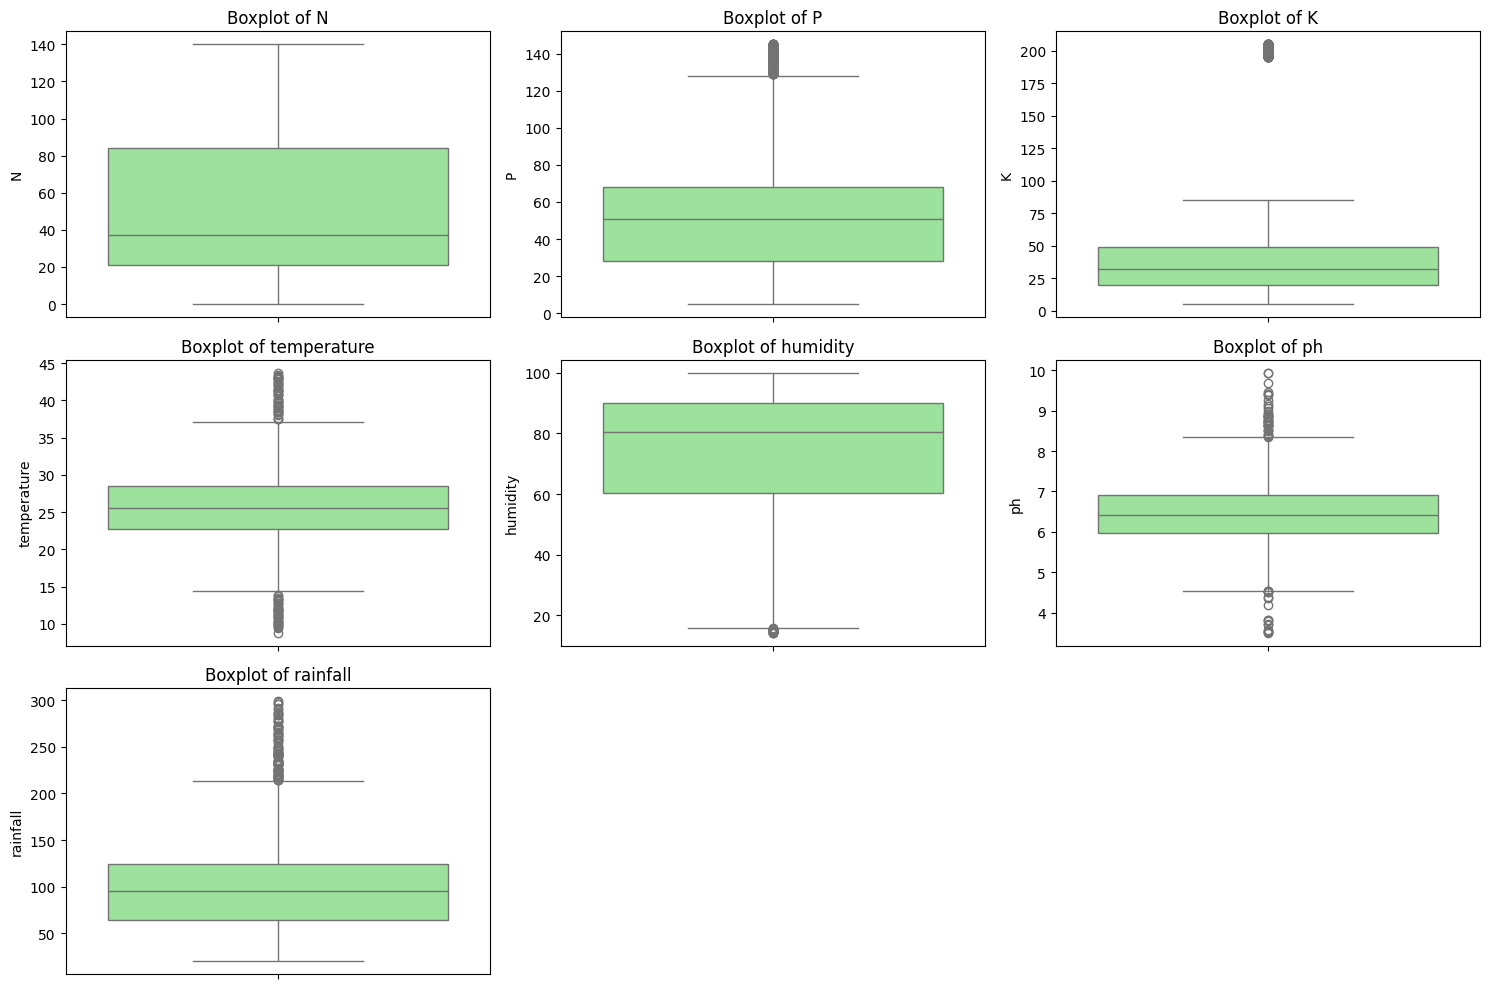

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=crop_data[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [ ]:
crop_dict = {
    "rice": 1,
    "maize": 2,
    "chickpea": 3,
    "kidneybeans": 4,
    "pigeonpeas": 5,
    "mothbeans": 6,
    "mungbean": 7,
    "blackgram": 8,
    "lentil": 9,
    "pomegranate": 10,
    "banana": 11,
    "mango": 12,
    "grapes": 13,
    "watermelon": 14,
    "muskmelon": 15,
    "apple": 16,
    "orange": 17,
    "papaya": 18,
    "coconut": 19,
    "cotton": 20,
    "jute": 21,
    "coffee": 22
}


In [ ]:
crop_data['crop_label']= crop_data['label'].map(crop_dict)

In [ ]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [ ]:
crop_data= crop_data.drop(columns='label', axis= 1)

In [ ]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [ ]:
crop_data['crop_label'].value_counts()

,count
crop_label,
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


In [ ]:
X= crop_data.drop(columns='crop_label', axis=1)
Y= crop_data['crop_label']

In [ ]:
print(X.shape, Y.shape)

(2200, 7) (2200,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(1760, 7) (440, 7)


In [ ]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [ ]:
sc= StandardScaler()

In [ ]:
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Tree": ExtraTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

for name, model_class in models.items():
    model_class.fit(X_train, Y_train)
    ypred = model_class.predict(X_test)
    print(f"{name} with accuracy: {accuracy_score(Y_test, ypred)}")


Logistic Regression with accuracy: 0.9636363636363636
Naive Bayes with accuracy: 0.9954545454545455
Support Vector Classifier with accuracy: 0.9681818181818181
K-Nearest Neighbors with accuracy: 0.9659090909090909
Decision Tree with accuracy: 0.9886363636363636
Extra Tree with accuracy: 0.9454545454545454
Random Forest with accuracy: 0.9931818181818182
Bagging Classifier with accuracy: 0.9886363636363636
Gradient Boosting with accuracy: 0.9818181818181818
AdaBoost with accuracy: 0.14545454545454545


In [ ]:
rfc= RandomForestClassifier()
rfc.fit(X_train, Y_train)
ypred= rfc.predict(X_test)
accuracy= accuracy_score(Y_test, ypred)
print(accuracy)

0.9931818181818182


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(Y_test, ypred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        23
           6       1.00      0.96      0.98        24
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        20
           9       0.92      1.00      0.96        11
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        23
          17       1.00      1.00      1.00        14
    

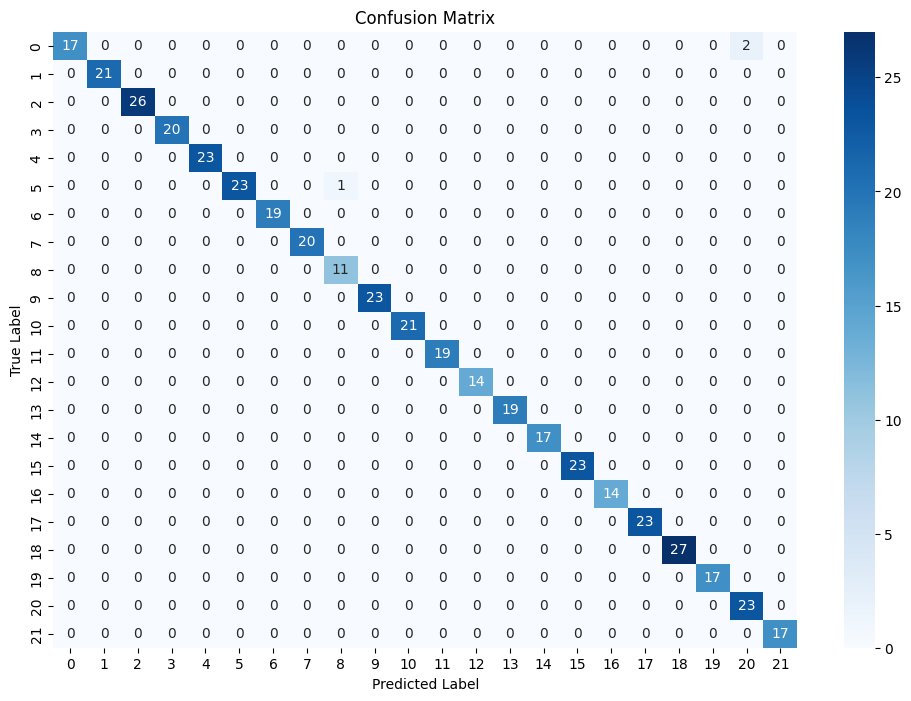

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, ypred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import f1_score

f1_macro = f1_score(Y_test, ypred, average='macro')
f1_weighted = f1_score(Y_test, ypred, average='weighted')


In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(Y_test, ypred, average='weighted')
recall = recall_score(Y_test, ypred, average='weighted')


In [ ]:
from sklearn.metrics import (
    accuracy_score, classification_report,
    f1_score, precision_score, recall_score
)

def evaluate_model(y_true, y_pred):
    print(f"✅ Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"✅ F1 Score (Macro): {f1_score(y_true, y_pred, average='macro'):.4f}")
    print(f"✅ F1 Score (Weighted): {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"✅ Precision (Weighted): {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"✅ Recall (Weighted): {recall_score(y_true, y_pred, average='weighted'):.4f}")

    print("\n📊 Classification Report:")
    print(classification_report(y_true, y_pred))


In [ ]:
evaluate_model(Y_test, ypred)


✅ Accuracy: 0.9932
✅ F1 Score (Macro): 0.9926
✅ F1 Score (Weighted): 0.9932
✅ Precision (Weighted): 0.9937
✅ Recall (Weighted): 0.9932

📊 Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        23
           6       1.00      0.96      0.98        24
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        20
           9       0.92      1.00      0.96        11
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        19
          15       1.00     

In [ ]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                            columns=X.columns)
    features = sc.transform(features)
    prediction = rfc.predict(features)
    return prediction[0]


In [ ]:


N= 28
P= 25
K= 35
temperature= 28.0
humidity= 91.7
ph= 5.54
rainfall= 160.95

predict= recommendation(N, P, K, temperature, humidity, ph, rainfall)

# predict= recommendation(20,10,10,14.38120357,16.63805158, 7.736337905,101.52056697)

new_crop_dict = {
    1: "rice",
    2: "maize",
    3: "chickpea",
    4: "kidneybeans",
    5: "pigeonpeas",
    6: "mothbeans",
    7: "mungbean",
    8: "blackgram",
    9: "lentil",
    10: "pomegranate",
    11: "banana",
    12: "mango",
    13: "grapes",
    14: "watermelon",
    15: "muskmelon",
    16: "apple",
    17: "orange",
    18: "papaya",
    19: "coconut",
    20: "cotton",
    21: "jute",
    22: "coffee"
}

if predict in new_crop_dict:
    crop = new_crop_dict[predict]
    print(f"{crop} is the best crop to be cultivated")
else:
    print("Sorry! Unable to recommend any crop for these conditions")


coconut is the best crop to be cultivated


In [ ]:
import pickle
pickle.dump(rfc, open('model.pkl', 'wb'))

In [ ]:
# Save after training
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)
